In [10]:
import pandas_ta as ta
from lib.fetch_ohlc import fetch_ohlc
from tradingstrategy.chain import ChainId
from tradingstrategy.timebucket import TimeBucket

candles = fetch_ohlc(
    trading_pair=("WETH", "USDC"),
    chain_id=ChainId.ethereum,
    exchange_slug="uniswap-v3",
    timeframe=TimeBucket.h4,
    fee_tier=0.0005,
)
# candles

Started Trading Strategy in Jupyter notebook environment, configuration is stored in /home/alpha/.tradingstrategy


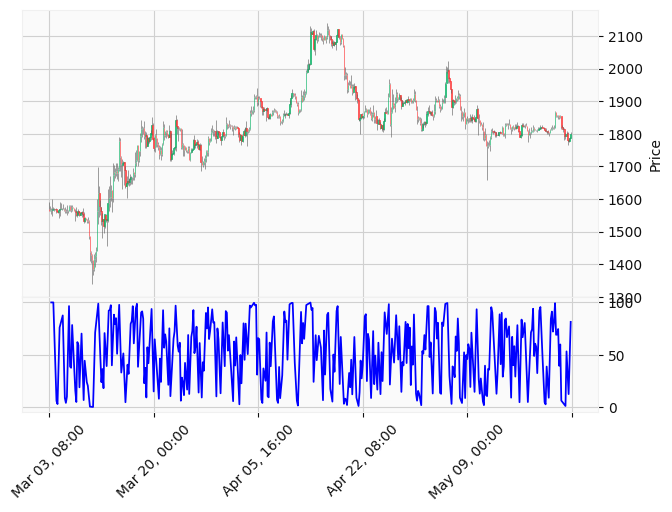

In [11]:
import mplfinance as mpf


df = candles[["open", "high", "low", "close", "volume"]]
df = df.iloc[-500:]
df.rename(
    {"open": "Open", "high": "High", "low": "Low", "close": "Close"},
    axis=1,
    inplace=True,
)

df.reset_index(inplace=True)
df.rename(columns={"timestamp": "Date"}, inplace=True)
df.set_index("Date", inplace=True)

rsi = ta.rsi(df["Close"], length=2)
mpf.plot(
    df,
    type="candle",
    volume=False,
    style="yahoo",
    addplot=[mpf.make_addplot(rsi, panel=1, color="blue")],
)

                     ts            o            h            l  ...   s  tc  bv  sv
0   2023-05-09T00:00:00  1847.754808  1855.716862  1840.747014  ... NaN NaN NaN NaN
1   2023-05-09T04:00:00  1845.538943  1849.418453  1832.665922  ... NaN NaN NaN NaN
2   2023-05-09T08:00:00  1849.418453  1849.418453  1837.069382  ... NaN NaN NaN NaN
3   2023-05-09T12:00:00  1848.863738  1859.803729  1837.620558  ... NaN NaN NaN NaN
4   2023-05-09T16:00:00  1841.115181  1855.345774  1837.804320  ... NaN NaN NaN NaN
..                  ...          ...          ...          ...  ...  ..  ..  ..  ..
95  2023-05-24T20:00:00  1792.968793  1808.273215  1792.610253  ... NaN NaN NaN NaN
96  2023-05-25T00:00:00  1801.054929  1804.660463  1765.569956  ... NaN NaN NaN NaN
97  2023-05-25T04:00:00  1780.996653  1786.347397  1775.661935  ... NaN NaN NaN NaN
98  2023-05-25T08:00:00  1778.682977  1789.207698  1778.682977  ... NaN NaN NaN NaN
99  2023-05-25T12:00:00  1788.134549  1806.104697  1788.134549  ... NaN NaN 

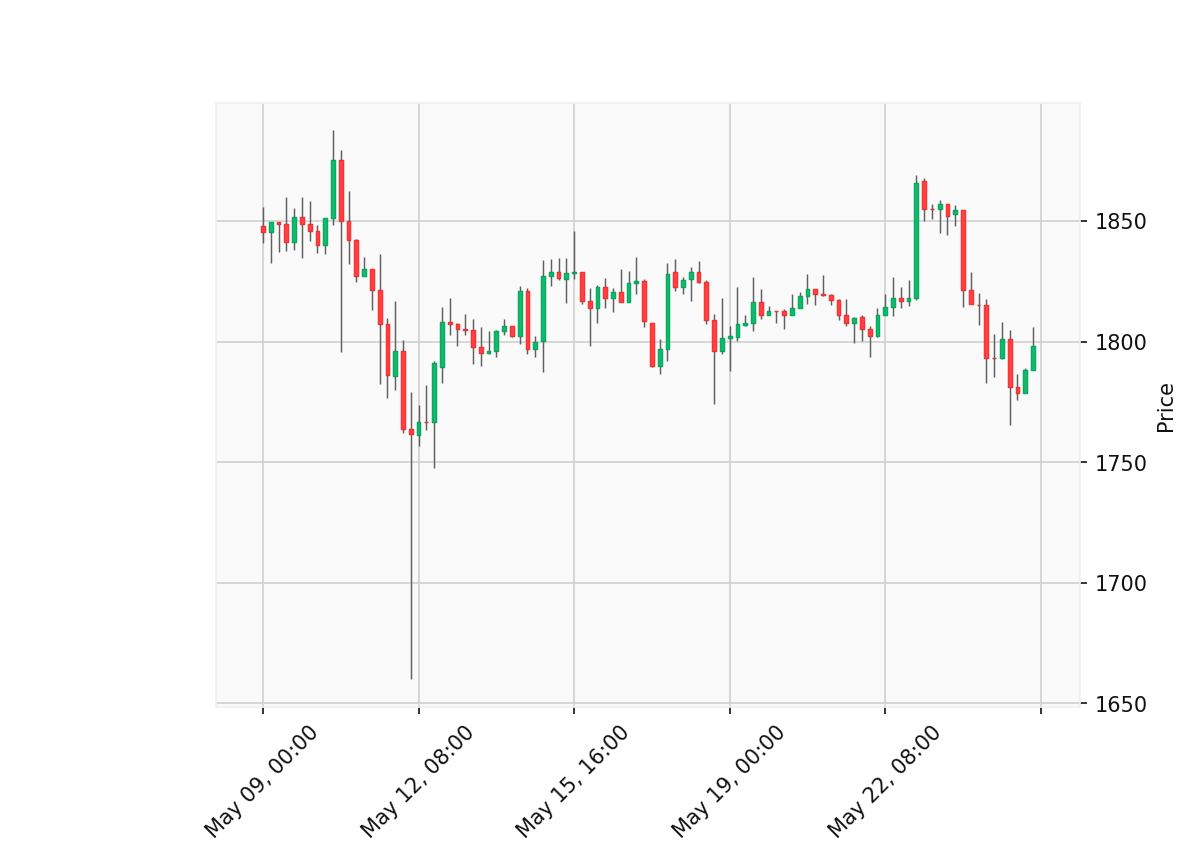

In [3]:
#### Same candle loaded from the website

import pandas as pd
import requests

# Set the URL and headers
url = "https://tradingstrategy.ai/api/candles?pair_id=2697765&exchange_type=uniswap_v3&time_bucket=4h"
# Perform the request
response = requests.get(url)

# Read the JSON data from the URL into a DataFrame
df = pd.read_json(response.text)

# Print the DataFrame
print(df)
df.rename(
    {"o": "Open", "h": "High", "l": "Low", "c": "Close", "ts": "Date"},
    axis=1,
    inplace=True,
)
df["Date"] = pd.to_datetime(df["Date"], format="%Y-%m-%dT%H:%M:%S")
df.set_index("Date", inplace=True)
mpf.plot(df, type="candle", volume=False, style="yahoo")